<a href="https://colab.research.google.com/github/andvar95/Blog_Hub/blob/Normal-Forms/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Experiment 2

In [ ]:
# Importaciones
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelBinarizer,normalize,scale,MinMaxScaler,MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, LeaveOneOut, train_test_split
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer

from sklearn.metrics import plot_confusion_matrix
from google.colab import drive
drive.mount('/content/drive')
labels=["'au_'", "'wd_'", "'ww_'","'bh_'"]
image = ['surfaces','sections']
features =[ 'H','S','V','LBP']
im = 1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Esto solo es para 4 clases en caso  de usar 3 clase comentar esto


In [ ]:
ds = pd.read_excel(open('/content/drive/My Drive/Four_Classes/extract-features-4class.xlsx','rb'),sheet_name=image[im])
ds['index'] = np.concatenate((range(750),range(750),range(750),range(750)))
ds

,class,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,lbp0,lbp1,lbp2,lbp3,lbp4,lbp5,lbp6,lbp7,lbp8,lbp9,index
0,1,20876,8919,6431,2064,593,225,65,21,6,4,26171,9027,2121,1059,495,238,68,19,3,3,13952,15316,5210,2338,1215,618,318,171,54,12,0.277678,0.091562,0.029922,0.123579,0.087672,0.021245,0.073010,0.237283,0.035308,0.022741,0
1,1,20675,11282,5743,1118,277,70,21,10,4,4,17070,14933,4896,1487,499,180,89,40,6,4,10840,15839,7570,3118,1174,386,152,79,35,11,0.260357,0.084610,0.040171,0.143610,0.094401,0.015315,0.074567,0.209641,0.046447,0.030881,1
2,1,39187,0,0,0,0,0,12,1,0,4,27042,9955,1591,383,118,62,33,14,4,2,21312,13677,2967,673,249,170,99,45,10,2,0.215204,0.087506,0.036288,0.167432,0.087506,0.019063,0.067065,0.260680,0.033762,0.025494,2
3,1,16792,9897,8523,2926,784,183,63,25,9,2,12806,14484,7428,2855,1029,365,145,57,31,4,17139,15422,4766,1360,346,87,38,23,18,5,0.281639,0.077693,0.052807,0.128073,0.084674,0.012140,0.079818,0.182094,0.051290,0.049772,3
4,1,15190,9280,8371,4506,1371,313,110,41,19,3,18181,13448,5113,1575,559,192,85,37,12,2,21610,11896,3568,1276,489,184,108,40,21,12,0.258083,0.080405,0.031768,0.127917,0.065786,0.013495,0.067473,0.304470,0.033174,0.017430,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4,23630,7086,4661,2750,669,272,88,37,8,3,17036,10310,6344,3206,1449,583,197,55,21,3,11832,15860,7253,2613,1035,440,109,42,16,4,0.246325,0.103810,0.028203,0.125713,0.085809,0.023102,0.070807,0.268227,0.026703,0.021302,745
2996,4,21761,6061,5191,3348,1795,741,182,89,22,14,15530,11781,6916,3147,1211,400,136,57,18,8,9396,14406,9222,3283,1631,801,286,145,30,4,0.220993,0.107955,0.026615,0.130682,0.058313,0.025419,0.059809,0.299940,0.040371,0.029904,746
2997,4,25281,5256,5271,2554,638,154,41,8,0,1,14015,10522,7191,4165,2017,877,262,95,44,16,9565,11100,10299,4820,2180,829,285,99,20,7,0.225249,0.110299,0.032558,0.124917,0.061462,0.019934,0.054485,0.294684,0.039535,0.036877,747
2998,4,26097,5028,4404,2840,562,204,43,16,7,3,19065,10565,6301,2281,667,201,77,34,11,2,9823,11512,10101,4692,2059,762,181,62,7,5,0.236511,0.131929,0.025129,0.135625,0.066888,0.016630,0.055802,0.265336,0.034368,0.031781,748


In [ ]:
def label(y):
  labels=["'au_'", "'wd_'", "'ww_'","'bh_'"]
  lab = []

  for i in range(len(y)):
    lab.append(labels[y[i]-1])
  
  return lab


ds['class'] = label(ds['class'])

y = ds['class']



In [ ]:
#h+s+v+lbp   4 clases
'''
final_features = np.empty((x.shape[0],0))
print(final_features)
sel = 1234
for i in range(5,-1,-1):
    
    copia = sel
    div = math.pow(10,i)
    #print(i)
    copia = int(copia /div)
    
    print(copia)
    if copia>=1:
        if copia==1:
            fu = np.concatenate((x[:,0:10],x[:,40:50]),axis=1)
            final_features = np.concatenate((final_features,fu),axis=1)
        elif copia ==2:
            fu = np.concatenate((x[:,10:20],x[:,50:60]),axis=1)
            final_features = np.concatenate((final_features,fu),axis=1)
        elif copia ==3:
            fu = np.concatenate((x[:,20:30],x[:,60:70]),axis=1)
            final_features = np.concatenate((final_features,fu),axis=1)
        elif copia == 4:
            fu = np.concatenate((x[:,30:40],x[:,70:80]),axis=1)
            final_features = np.concatenate((final_features,fu),axis=1)
        
        
        sel = sel - copia*math.pow(10,i)
        
#final_features = np.concatenate(final_features,axis=1)
final_features =  np.array(final_features)
'''

In [ ]:
#h+s+v+lbp   4 clases
nombre = ""
final_features = pd.DataFrame()
print(final_features)
#seleccio de features
#1=h, 2=s, 3=v ,4 =lbp
sel = 3
for i in range(5,-1,-1):
    
    copia = sel
    div = math.pow(10,i)
    #print(i)
    copia = int(copia /div)
    
    print(copia)
    if copia>=1:
        if copia==1:
            nombre += features[0]
            final_features = pd.concat([final_features,ds.iloc[:,1:11]],axis=1)
        elif copia ==2:
          nombre += features[1]
          final_features = pd.concat([final_features,ds.iloc[:,11:21]],axis=1)
        elif copia ==3:
          nombre += features[2]
          final_features = pd.concat([final_features,ds.iloc[:,21:31]],axis=1)
        elif copia == 4:
          final_features = pd.concat([final_features,ds.iloc[:,31:41]],axis=1)
          nombre += features[3]
        
        sel = sel - copia*math.pow(10,i)
        
final_features = pd.concat([final_features,ds['index']],axis=1)
final_features 

Empty DataFrame
Columns: []
Index: []
0
0
0
0
0
3


,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,index
0,13952,15316,5210,2338,1215,618,318,171,54,12,0
1,10840,15839,7570,3118,1174,386,152,79,35,11,1
2,21312,13677,2967,673,249,170,99,45,10,2,2
3,17139,15422,4766,1360,346,87,38,23,18,5,3
4,21610,11896,3568,1276,489,184,108,40,21,12,4
...,...,...,...,...,...,...,...,...,...,...,...
2995,11832,15860,7253,2613,1035,440,109,42,16,4,745
2996,9396,14406,9222,3283,1631,801,286,145,30,4,746
2997,9565,11100,10299,4820,2180,829,285,99,20,7,747
2998,9823,11512,10101,4692,2059,762,181,62,7,5,748


In [ ]:
# Generar los conjuntos de datos
X_train, X_test, Y_train, Y_test = train_test_split(final_features, y, test_size=0.20, random_state=211292, stratify=y)
Idx_train = X_train['index']
Idx_test = X_test['index']



In [ ]:
# Escalar datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Instantiate model with 1000 decision trees
#Sections
clf = RandomForestClassifier(n_estimators = 40, max_features = 'log2', min_samples_split = 2, min_samples_leaf = 2, max_depth= 12, bootstrap = False, criterion = 'entropy')
#surfaces
#clf = RandomForestClassifier(n_estimators = 160, min_samples_split = 4, min_samples_leaf = 1, max_depth= 50, bootstrap = True, criterion = 'gini')

In [ ]:
# Entrenar
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predecir
predict = clf.predict(X_test)

In [ ]:
from sklearn.model_selection import LeaveOneOut
# Cross validation
print("=== Cross Validation ===")
scores = cross_val_score(clf, final_features, y, cv=10)
print(scores.mean())

=== Cross Validation ===
0.6013333333333334


In [ ]:
# Print results for section dataset
print("=== Confusion Matrix ===")
cm = confusion_matrix(Y_test, predict, labels=labels)
print(cm)
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, predict, labels=labels))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(Y_test, predict))
print('\n')

=== Confusion Matrix ===
[[ 90  18  25  17]
 [ 15 102  21  12]
 [  6  14 119  11]
 [ 25   7  21  97]]


=== Classification Report ===
              precision    recall  f1-score   support

       'au_'       0.66      0.60      0.63       150
       'wd_'       0.72      0.68      0.70       150
       'ww_'       0.64      0.79      0.71       150
       'bh_'       0.71      0.65      0.68       150

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.68      0.68      0.68       600



=== Accuracy Score ===
0.68




In [ ]:
data = []
for idx,test,pre in zip(Idx_test ,Y_test,predict):
  data.append([idx,test,pre])


df = pd.DataFrame(data,columns=['index','true','Predict'])
df['evaluation'] = np.where(df.true == df.Predict, 'Verdadero','Falso')
df.to_excel('/content/drive/MyDrive/Four_Classes/'+nombre+'_'+image[im]+'.xlsx', sheet_name= "hoja1" )

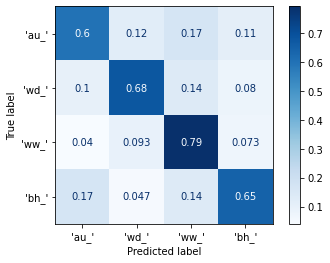

In [ ]:
 disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=labels,labels=labels,
                                 cmap=plt.cm.Blues,normalize="true",xticks_rotation='horizontal')
plt.show()

In [ ]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Crear el clasificador
rf_model = RandomForestClassifier(random_state=1)

# Crear el metaestimador
clf = GridSearchCV(rf_model, model_params, cv=5)

# Ejecutar el metaestimador
model = clf.fit(x, y)

# Imprimir el mejor estimador
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
clf_gs = RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,class_weight=None,criterion='gini',max_depth=None,max_features='sqrt',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=4,min_weight_fraction_leaf=0.0,n_estimators=50,n_jobs=None,oob_score=False,random_state=1,verbose=0,warm_start=False)

In [ ]:
# Entrenar
clf_gs.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Predecir
predict_gs = clf_gs.predict(X_test)

In [ ]:
print("=== Confusion Matrix ===")
cm_gs = confusion_matrix(Y_test, predict_gs, labels)
print(cm_gs)
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, predict_gs, labels))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(Y_test, predict_gs))
print('\n')

=== Confusion Matrix ===
[[55  4  3]
 [ 0 67  3]
 [ 6  1 50]]


=== Classification Report ===
              precision    recall  f1-score   support

       'au_'       0.90      0.89      0.89        62
       'ww_'       0.93      0.96      0.94        70
       'wd_'       0.89      0.88      0.88        57

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189



=== Accuracy Score ===
0.91005291005291




In [ ]:
# Cross validation
print("=== Cross Validation Scores Section ===")
scores_cv = cross_val_score(clf_gs, x, y, cv=10)
print(scores_cv.mean())

=== Cross Validation Scores Section ===


NameError: ignored